In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np

In [4]:
data=pd.read_csv("/content/drive/MyDrive/BDM ASSIGNMENT/reviews.csv")

In [5]:
data.head(10)

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN
5,2022-07-09 13:20:20,The player controls sometimes disappear for no...,3,7,NaN
6,2022-07-09 13:19:21,I love the selection and the lyrics are provid...,5,0,NaN
7,2022-07-09 13:17:22,Still extremely slow when changing storage to ...,3,16,NaN
8,2022-07-09 13:16:49,It's a great app and the best mp3 music app I ...,5,0,NaN
9,2022-07-09 13:11:32,"I'm deleting this app, for the following reaso...",1,318,NaN


In [6]:
from textblob import TextBlob
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity
data['Sentiment'] = data['Review'].apply(calculate_sentiment)
data.head(10)


,Time_submitted,Review,Rating,Total_thumbsup,Reply,Sentiment
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN,0.440333
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN,0.166667
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN,0.100000
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN,-0.266667
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN,0.000000
5,2022-07-09 13:20:20,The player controls sometimes disappear for no...,3,7,NaN,0.000000
6,2022-07-09 13:19:21,I love the selection and the lyrics are provid...,5,0,NaN,0.625000
7,2022-07-09 13:17:22,Still extremely slow when changing storage to ...,3,16,NaN,-0.150000
8,2022-07-09 13:16:49,It's a great app and the best mp3 music app I ...,5,0,NaN,0.950000
9,2022-07-09 13:11:32,"I'm deleting this app, for the following reaso...",1,318,NaN,0.178571


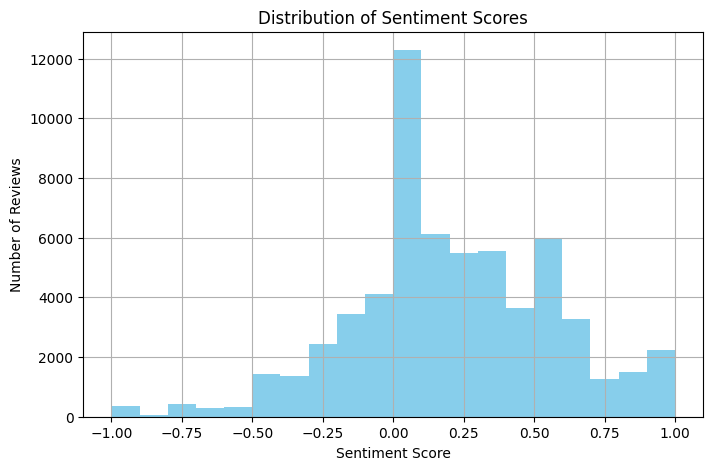

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(data['Sentiment'], bins=20, color='skyblue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

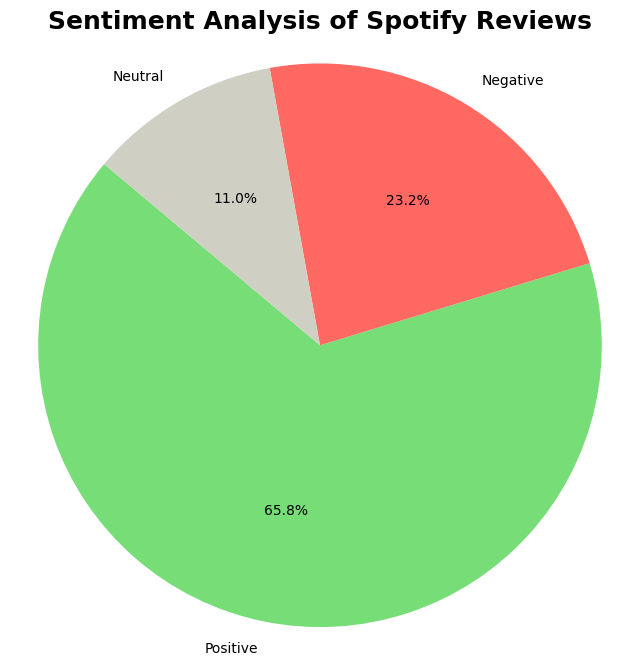

In [8]:
def sentiment_category(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

data['Sentiment Category'] = data['Sentiment'].apply(sentiment_category)

sentiment_counts = data['Sentiment Category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#77dd77', '#ff6961', '#cfcfc4'])
plt.title('Sentiment Analysis of Spotify Reviews', fontsize=18, fontweight='bold')
plt.axis('equal')
plt.show()

In [9]:
from transformers import pipeline

sentiment_model = pipeline("sentiment-analysis")

def transformers_sentiment(text):
    return sentiment_model(text)[0]
sample_reviews = data['Review'].head(5).apply(transformers_sentiment)
sample_reviews

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

0    {'label': 'POSITIVE', 'score': 0.9997498393058...
1    {'label': 'POSITIVE', 'score': 0.9996293783187...
2    {'label': 'NEGATIVE', 'score': 0.9997804760932...
3    {'label': 'NEGATIVE', 'score': 0.9995805621147...
4    {'label': 'NEGATIVE', 'score': 0.9959551095962...
Name: Review, dtype: object

In [10]:
def detailed_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0.2:
        return 'Positive'
    elif polarity < -0.2:
        return 'Negative'
    else:
        return 'Neutral'

data['Detailed Sentiment'] = data['Review'].apply(detailed_sentiment)
detailed_sentiment_counts = data['Detailed Sentiment'].value_counts()
detailed_sentiment_counts

Detailed Sentiment
Positive    28999
Neutral     26308
Negative     6287
Name: count, dtype: int64

In [11]:
def calculate_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

data['Subjectivity'] = data['Review'].apply(calculate_subjectivity)

def identify_key_phrases(sentiments):
    positive_phrases = []
    negative_phrases = []
    neutral_phrases = []
    for index, row in sentiments.iterrows():

        phrases = row['Review'].split('.')
        for phrase in phrases:
            score = TextBlob(phrase).sentiment.polarity

            if score > 0.2:
                positive_phrases.append(phrase.strip())
            elif score < -0.2:
                negative_phrases.append(phrase.strip())
            else:
                neutral_phrases.append(phrase.strip())
    return positive_phrases, negative_phrases, neutral_phrases

subset_data = data.head(200)
positive_phrases, negative_phrases, neutral_phrases = identify_key_phrases(subset_data)

positive_phrases[:5], negative_phrases[:5], neutral_phrases[:5]

(['Great music service, the audio is high quality and the app is easy to use',
  'Also very quick and friendly support',
  'This app is super great',
  "I love the selection and the lyrics are provided with the song you're listening to!",
  "It's a great app and the best mp3 music app I have ever used but there is one problem that, why can't we play some songs or find some songs? despite this the app is wonderful I recommend it"],
 ['Please ignore previous negative rating',
  'Really buggy and terrible to use as of recently',
  'We now have spotify premium family and the alexa integration is poor',
  "Worst app always says I'm offline and never showed any song or podcast",
  "So what's the point of this feature? Disappointed"],
 ['',
  'I give it five stars+',
  'This pop-up "Get the best Spotify experience on Android 12" is too annoying',
  "Please let's get rid of this",
  ''])

In [12]:
from collections import Counter
import re

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    text = text.lower()
    text = text.strip()
    return text

def extract_keywords(reviews):
    words = []
    for review in reviews:
        tokens = clean_text(review).split()
        words.extend(tokens)
    return words

negative_reviews = data[data['Detailed Sentiment'] == 'Negative']['Review']
neutral_reviews = data[data['Detailed Sentiment'] == 'Neutral']['Review']

negative_keywords = extract_keywords(negative_reviews)
neutral_keywords = extract_keywords(neutral_reviews)

most_common_negative = Counter(negative_keywords).most_common(10)
most_common_neutral = Counter(neutral_keywords).most_common(10)

most_common_negative, most_common_neutral

([('to', 7442),
  ('i', 7424),
  ('the', 7302),
  ('it', 5122),
  ('and', 5071),
  ('app', 3694),
  ('a', 3274),
  ('is', 3053),
  ('my', 2586),
  ('this', 2488)],
 [('the', 39064),
  ('to', 35415),
  ('i', 34790),
  ('and', 24259),
  ('it', 23384),
  ('a', 17994),
  ('app', 16013),
  ('is', 14047),
  ('my', 12768),
  ('for', 11044)])

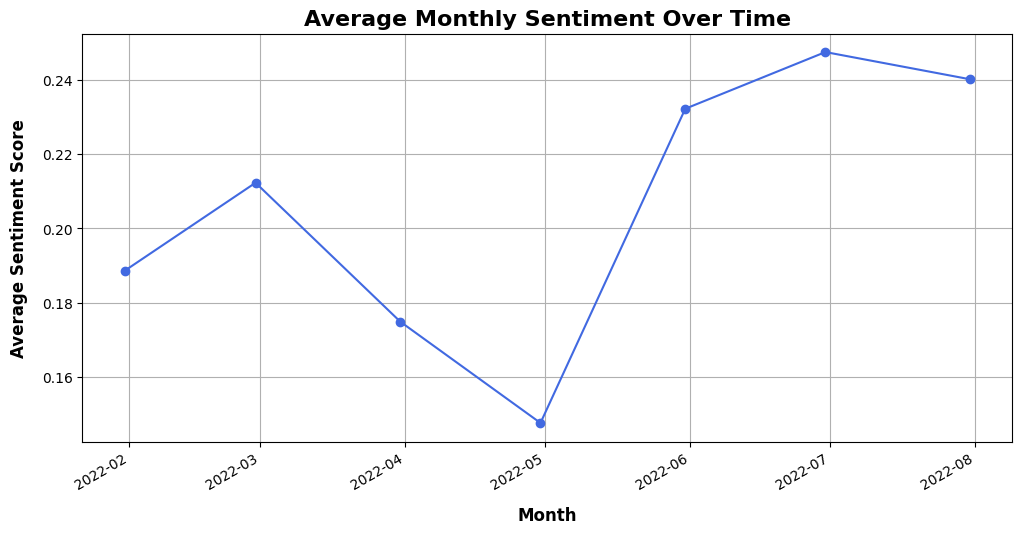

In [13]:
import matplotlib.dates as mdates
data['Time_submitted'] = pd.to_datetime(data['Time_submitted'])
monthly_sentiment = data.groupby(pd.Grouper(key='Time_submitted', freq='M')).agg({'Sentiment': 'mean'}).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sentiment['Time_submitted'], monthly_sentiment['Sentiment'], marker='o', linestyle='-', color='royalblue')
plt.title('Average Monthly Sentiment Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12, fontweight='bold', labelpad=10)
plt.ylabel('Average Sentiment Score', fontsize=12, fontweight='bold', labelpad=10)
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()
plt.show()

In [14]:
data_head = data.head()
summary_statistics = data.describe()

data_head, summary_statistics

(       Time_submitted                                             Review  \
 0 2022-07-09 15:00:00  Great music service, the audio is high quality...   
 1 2022-07-09 14:21:22  Please ignore previous negative rating. This a...   
 2 2022-07-09 13:27:32  This pop-up "Get the best Spotify experience o...   
 3 2022-07-09 13:26:45    Really buggy and terrible to use as of recently   
 4 2022-07-09 13:20:49  Dear Spotify why do I get songs that I didn't ...   
 
    Rating  Total_thumbsup Reply  Sentiment Sentiment Category  \
 0       5               2   NaN   0.440333           Positive   
 1       5               1   NaN   0.166667           Positive   
 2       4               0   NaN   0.100000           Positive   
 3       1               1   NaN  -0.266667           Negative   
 4       1               1   NaN   0.000000            Neutral   
 
   Detailed Sentiment  Subjectivity  
 0           Positive      0.654667  
 1            Neutral      0.495833  
 2            Neutral   

In [15]:
sentiment_summary = data['Sentiment'].describe()
rating_counts = data['Rating'].value_counts()
ratings_sentiment_correlation = data[['Rating', 'Sentiment']].corr()
thumbs_up_summary = data['Total_thumbsup'].describe()

sentiment_summary, rating_counts, ratings_sentiment_correlation, thumbs_up_summary

(count    61594.000000
 mean         0.203202
 std          0.361436
 min         -1.000000
 25%          0.000000
 50%          0.178125
 75%          0.458333
 max          1.000000
 Name: Sentiment, dtype: float64,
 Rating
 5    22095
 1    17653
 4     7842
 2     7118
 3     6886
 Name: count, dtype: int64,
              Rating  Sentiment
 Rating     1.000000   0.576815
 Sentiment  0.576815   1.000000,
 count    61594.000000
 mean         7.649381
 std         89.323143
 min          0.000000
 25%          0.000000
 50%          0.000000
 75%          1.000000
 max       8195.000000
 Name: Total_thumbsup, dtype: float64)

In [16]:
import seaborn as sns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61594 entries, 0 to 61593
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Time_submitted      61594 non-null  datetime64[ns]
 1   Review              61594 non-null  object        
 2   Rating              61594 non-null  int64         
 3   Total_thumbsup      61594 non-null  int64         
 4   Reply               216 non-null    object        
 5   Sentiment           61594 non-null  float64       
 6   Sentiment Category  61594 non-null  object        
 7   Detailed Sentiment  61594 non-null  object        
 8   Subjectivity        61594 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 4.2+ MB
None
Time_submitted         0.000000
Review                 0.000000
Rating                 0.000000
Total_thumbsup         0.000000
Reply                 99.649316
Sentiment              0.00000

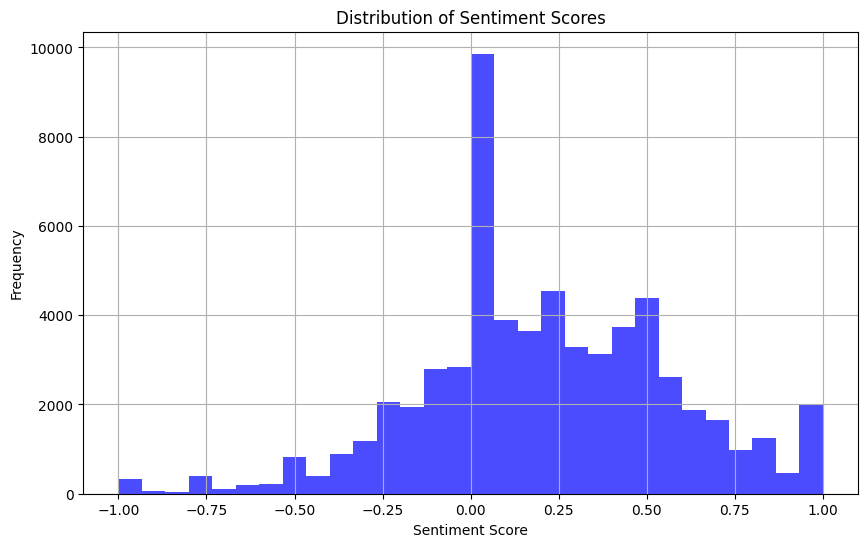

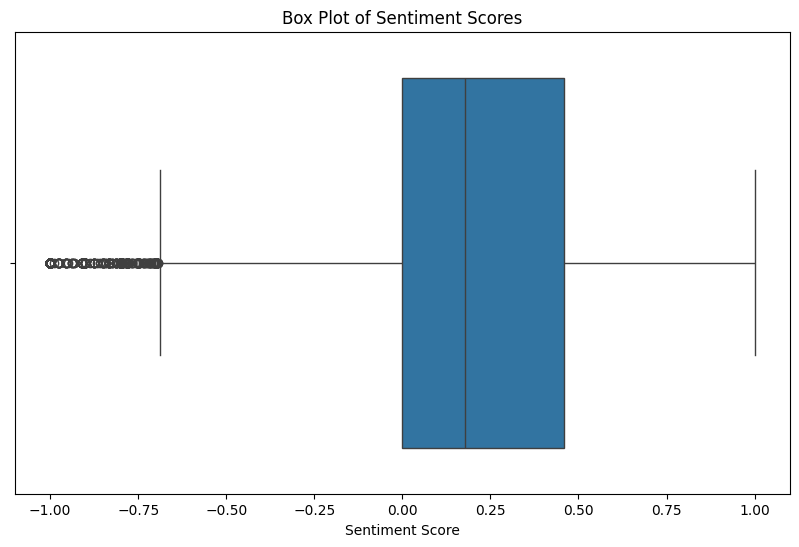

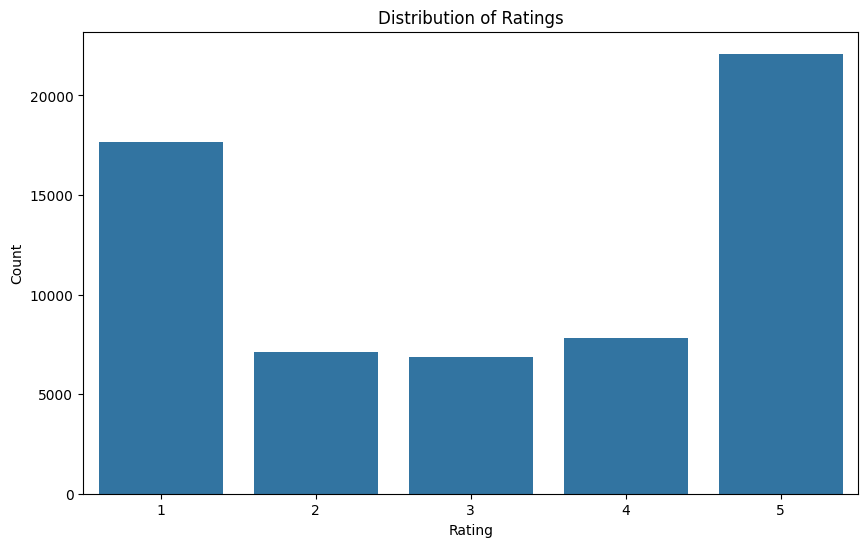

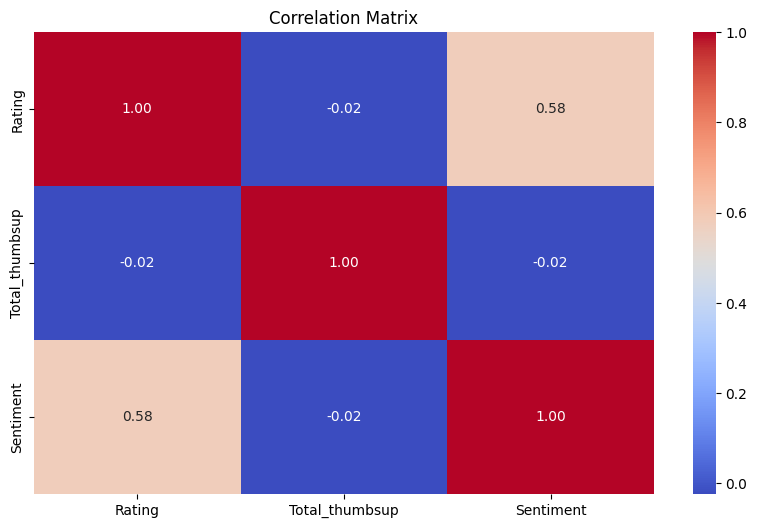

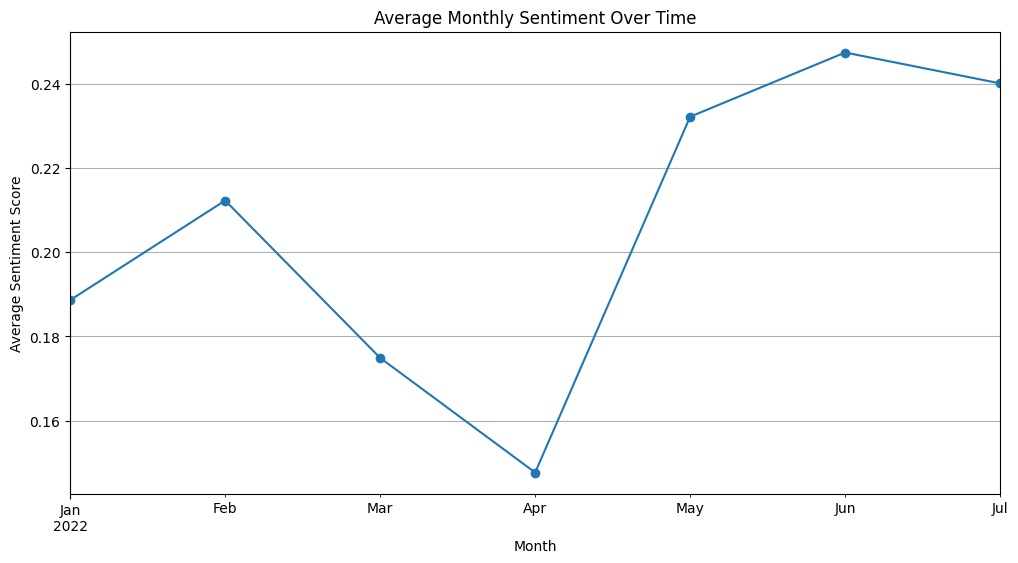

In [17]:
data['Time_submitted'] = pd.to_datetime(data['Time_submitted'])

print(data.info())

print(data.isnull().mean() * 100)

print(data.describe())

plt.figure(figsize=(10, 6))
plt.hist(data['Sentiment'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Sentiment'])
plt.title('Box Plot of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=data)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(data[['Rating', 'Total_thumbsup', 'Sentiment']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

plt.figure(figsize=(12, 6))
data.set_index('Time_submitted')['Sentiment'].resample('M').mean().plot(marker='o')
plt.title('Average Monthly Sentiment Over Time')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.show()



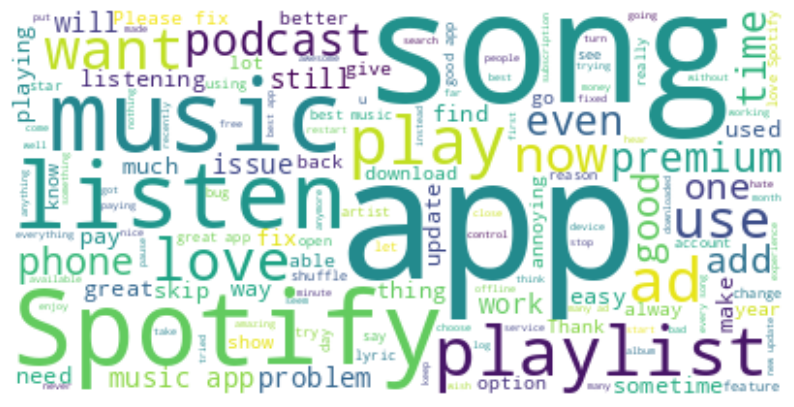

In [18]:
from wordcloud import WordCloud

text = ' '.join(review for review in data['Review'])
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
rating_distribution = data['Rating'].value_counts(normalize=True)

rating_distribution

Rating
5    0.358720
1    0.286603
4    0.127318
2    0.115563
3    0.111797
Name: proportion, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

data['Sentiment'] = data['Rating'].apply(lambda x: 'positive' if x > 3 else 'negative')
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=5000, min_df=5, max_df=0.9)
X_train = tfidf_vectorizer.fit_transform(train_data['Review'])
X_test = tfidf_vectorizer.transform(test_data['Review'])
y_train = train_data['Sentiment']
y_test = test_data['Sentiment']
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
evaluation_results = classification_report(y_test, y_pred, output_dict=True)

evaluation_results


{'negative': {'precision': 0.8567114600634154,
  'recall': 0.8976427780414491,
  'f1-score': 0.8766996291718171,
  'support': 6321},
 'positive': {'precision': 0.8864115168539326,
  'recall': 0.8417805935311771,
  'f1-score': 0.8635197537198563,
  'support': 5998},
 'accuracy': 0.8704440295478529,
 'macro avg': {'precision': 0.871561488458674,
  'recall': 0.8697116857863131,
  'f1-score': 0.8701096914458367,
  'support': 12319},
 'weighted avg': {'precision': 0.8711721257529618,
  'recall': 0.8704440295478529,
  'f1-score': 0.8702824773769587,
  'support': 12319}}

In [21]:
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
evaluation_results = classification_report(y_test, y_pred, output_dict=True)

evaluation_results

{'negative': {'precision': 0.8567114600634154,
  'recall': 0.8976427780414491,
  'f1-score': 0.8766996291718171,
  'support': 6321},
 'positive': {'precision': 0.8864115168539326,
  'recall': 0.8417805935311771,
  'f1-score': 0.8635197537198563,
  'support': 5998},
 'accuracy': 0.8704440295478529,
 'macro avg': {'precision': 0.871561488458674,
  'recall': 0.8697116857863131,
  'f1-score': 0.8701096914458367,
  'support': 12319},
 'weighted avg': {'precision': 0.8711721257529618,
  'recall': 0.8704440295478529,
  'f1-score': 0.8702824773769587,
  'support': 12319}}

In [22]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
evaluation_results = classification_report(y_test, y_pred, output_dict=True)

evaluation_results

{'negative': {'precision': 0.8567114600634154,
  'recall': 0.8976427780414491,
  'f1-score': 0.8766996291718171,
  'support': 6321},
 'positive': {'precision': 0.8864115168539326,
  'recall': 0.8417805935311771,
  'f1-score': 0.8635197537198563,
  'support': 5998},
 'accuracy': 0.8704440295478529,
 'macro avg': {'precision': 0.871561488458674,
  'recall': 0.8697116857863131,
  'f1-score': 0.8701096914458367,
  'support': 12319},
 'weighted avg': {'precision': 0.8711721257529618,
  'recall': 0.8704440295478529,
  'f1-score': 0.8702824773769587,
  'support': 12319}}

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

data['Sentiment'] = data['Rating'].apply(lambda x: 'positive' if x > 3 else 'negative')
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
tfidf_vectorizer = TfidfVectorizer(max_features=5000, min_df=5, max_df=0.9)
X_train = tfidf_vectorizer.fit_transform(train_data['Review'])
X_test = tfidf_vectorizer.transform(test_data['Review'])
y_train = train_data['Sentiment']
y_test = test_data['Sentiment']
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
evaluation_results = classification_report(y_test, y_pred, output_dict=True)

evaluation_results

{'negative': {'precision': 0.8567114600634154,
  'recall': 0.8976427780414491,
  'f1-score': 0.8766996291718171,
  'support': 6321},
 'positive': {'precision': 0.8864115168539326,
  'recall': 0.8417805935311771,
  'f1-score': 0.8635197537198563,
  'support': 5998},
 'accuracy': 0.8704440295478529,
 'macro avg': {'precision': 0.871561488458674,
  'recall': 0.8697116857863131,
  'f1-score': 0.8701096914458367,
  'support': 12319},
 'weighted avg': {'precision': 0.8711721257529618,
  'recall': 0.8704440295478529,
  'f1-score': 0.8702824773769587,
  'support': 12319}}

dict_keys(['negative', 'positive', 'accuracy', 'macro avg', 'weighted avg'])
dict_keys(['precision', 'recall', 'f1-score', 'support'])


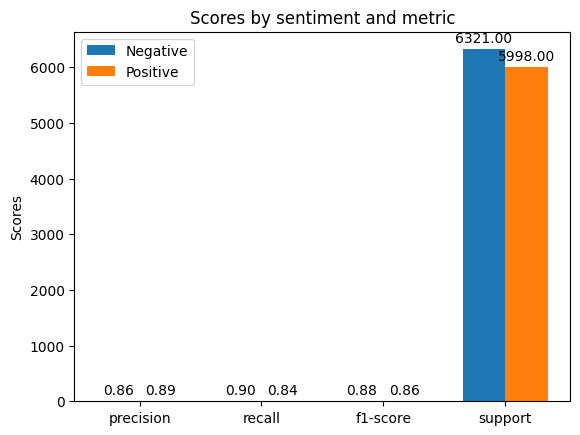

In [24]:
import matplotlib.pyplot as plt
import numpy as np

print(evaluation_results.keys())
print(evaluation_results['negative'].keys())

labels = ['precision', 'recall', 'f1-score', 'support']
negative_metrics = [evaluation_results['negative'][label] for label in labels[:-1]] + [evaluation_results['negative']['support']]
positive_metrics = [evaluation_results['positive'][label] for label in labels[:-1]] + [evaluation_results['positive']['support']]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, negative_metrics, width, label='Negative')
rects2 = ax.bar(x + width/2, positive_metrics, width, label='Positive')
ax.set_ylabel('Scores')
ax.set_title('Scores by sentiment and metric')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

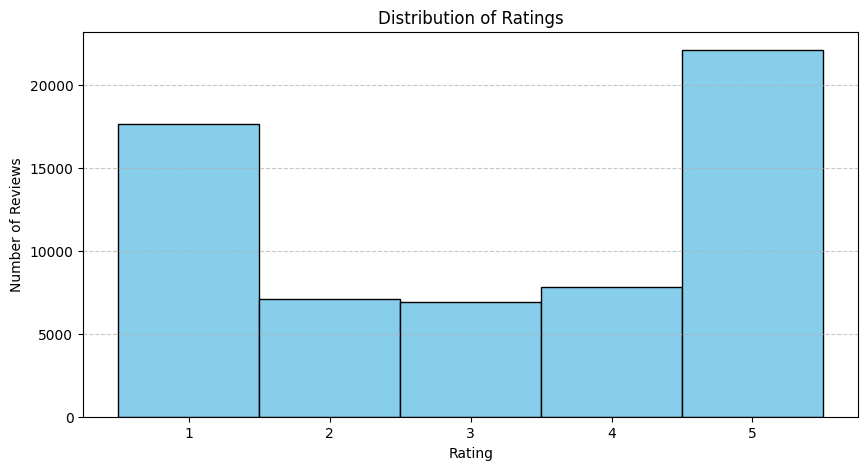

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(data['Rating'], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], edgecolor='black', color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Ratings')
plt.xticks(range(1, 6))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

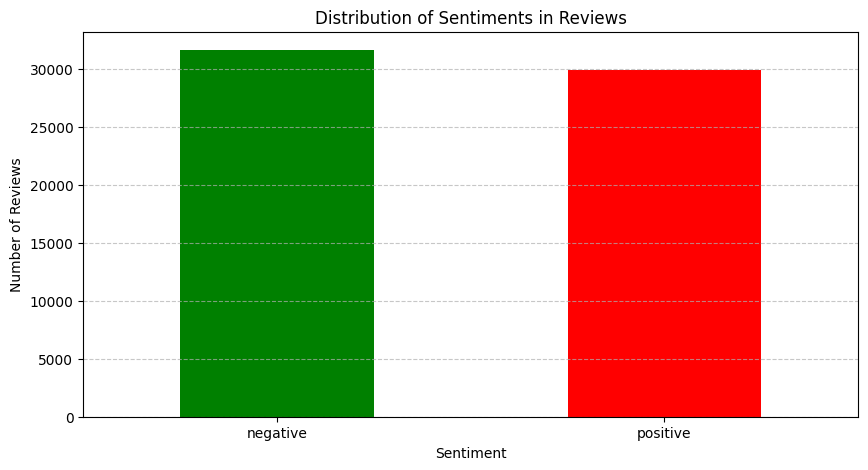

Sentiment
negative    31657
positive    29937
Name: count, dtype: int64

In [26]:
sentiment_distribution = data['Sentiment'].value_counts()

plt.figure(figsize=(10, 5))
sentiment_distribution.plot(kind='bar', color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Sentiments in Reviews')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

sentiment_distribution

In [27]:
top_reviews = data.sort_values(by='Total_thumbsup', ascending=False).head(5)
top_reviews[['Review', 'Rating', 'Total_thumbsup', 'Sentiment']]

,Review,Rating,Total_thumbsup,Sentiment
36968,The app is very good. I got to explore many ne...,4,8195,positive
37523,Forever glitchy. App play button and current s...,1,6026,negative
4877,there was a drop down thing that I think has r...,4,5336,positive
31673,2 years of use so far. This is my favorite app...,4,4791,positive
35203,Fantastic app. Have always had a great experie...,5,4777,positive


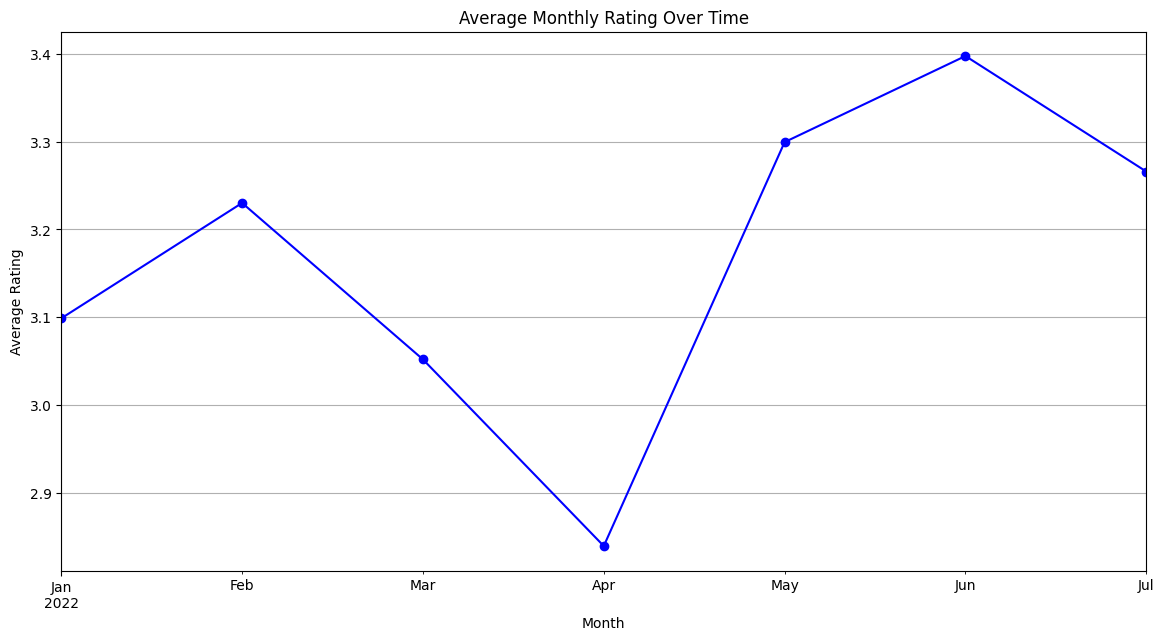

In [28]:
data['Time_submitted'] = pd.to_datetime(data['Time_submitted'])

plt.figure(figsize=(14, 7))
data.set_index('Time_submitted').resample('M')['Rating'].mean().plot(marker='o', linestyle='-', color='blue')
plt.title('Average Monthly Rating Over Time')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

In [29]:
data['Has_Reply'] = data['Reply'].notna()

reply_analysis = data.groupby(['Rating', 'Sentiment'])['Has_Reply'].agg(['sum', 'count', 'mean'])
reply_analysis.rename(columns={'sum': 'Number of Replies', 'count': 'Total Reviews', 'mean': 'Percentage with Replies'}, inplace=True)
reply_analysis['Percentage with Replies'] = reply_analysis['Percentage with Replies'].mul(100).round(2)
reply_analysis

,,Number of Replies,Total Reviews,Percentage with Replies
Rating,Sentiment,,,
1,negative,97,17653,0.55
2,negative,30,7118,0.42
3,negative,28,6886,0.41
4,positive,25,7842,0.32
5,positive,36,22095,0.16


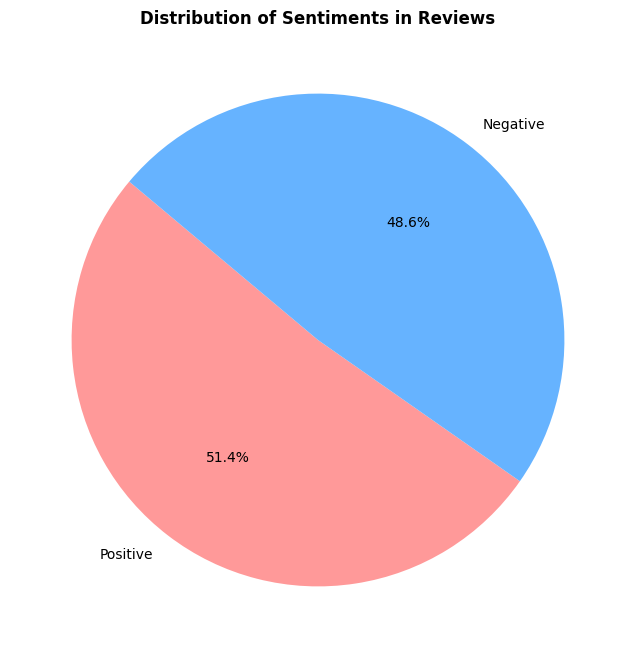

In [31]:
import matplotlib.pyplot as plt

adjusted_colors = ['#ff9999','#66b3ff','#99ff99']

plt.figure(figsize=(8, 8))
sentiment_distribution.plot(kind='pie', autopct='%1.1f%%', colors=adjusted_colors, startangle=140, labels=['Positive', 'Negative', 'Neutral'])
plt.title('Distribution of Sentiments in Reviews', fontweight='bold')
plt.ylabel('')
plt.show()

In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import nltk
import re
import tensorflow as tf
from tensorflow.keras import Sequential,Model
from tensorflow.keras import initializers
from tensorflow.keras.layers import Dense,MaxPool1D,Dropout,Embedding,Activation,Convolution1D,add,BatchNormalization,Flatten,Reshape,Concatenate,LSTM,GRU
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping,Callback
from tensorflow.keras.optimizers import Adam,SGD,Adamax,RMSprop
from tensorflow.keras import regularizers
from tensorflow.keras.utils import plot_model
from nltk.stem import WordNetLemmatizer
import string
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [33]:
spotify = data.drop(['Time_submitted', 'Total_thumbsup','Reply'], axis =1)
spotify

,Review,Rating,Sentiment,Sentiment Category,Detailed Sentiment,Subjectivity,Has_Reply
0,"Great music service, the audio is high quality...",5,positive,Positive,Positive,0.654667,False
1,Please ignore previous negative rating. This a...,5,positive,Positive,Neutral,0.495833,False
2,"This pop-up ""Get the best Spotify experience o...",4,positive,Positive,Neutral,0.600000,False
3,Really buggy and terrible to use as of recently,1,negative,Negative,Negative,0.483333,False
4,Dear Spotify why do I get songs that I didn't ...,1,negative,Neutral,Neutral,0.000000,False
...,...,...,...,...,...,...,...
61589,Even though it was communicated that lyrics fe...,1,negative,Positive,Positive,0.225000,False
61590,"Use to be sooo good back when I had it, and wh...",1,negative,Positive,Positive,0.475000,False
61591,This app would be good if not for it taking ov...,2,negative,Negative,Neutral,0.458333,False
61592,The app is good hard to navigate and won't jus...,2,negative,Positive,Positive,0.535417,False


In [34]:
spotify['Rating'].nunique()

5

In [35]:
spotify.duplicated().sum()


201

In [36]:
spotify = spotify.drop_duplicates(keep="first")
spotify.shape

(61393, 7)

<Axes: >

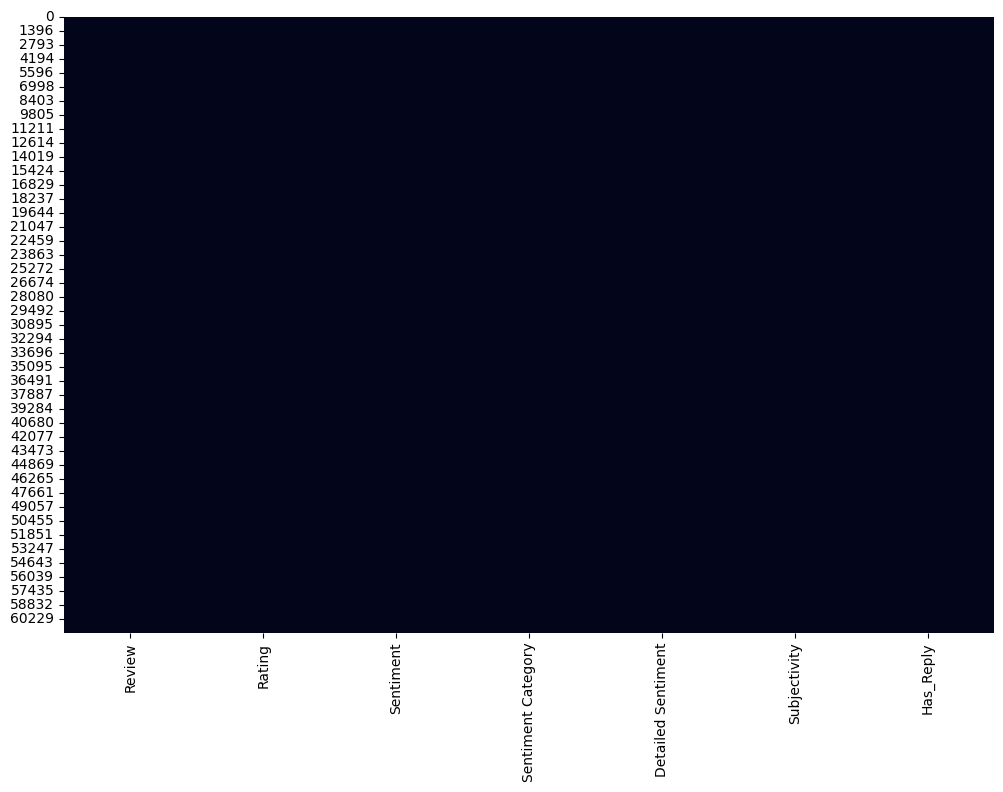

In [37]:
plt.figure(figsize=(12,8))
sns.heatmap(spotify.isnull(),cbar=False)

In [38]:
spotify.isnull().values.any()

False

In [39]:
spotify.Rating.value_counts()

Rating
5    21950
1    17617
4     7831
2     7114
3     6881
Name: count, dtype: int64

<Axes: xlabel='Rating', ylabel='count'>

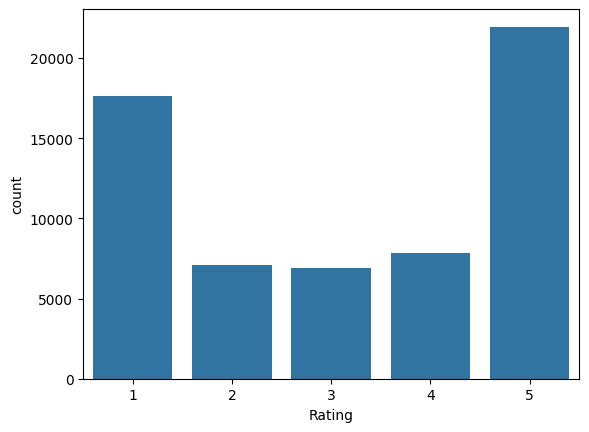

In [40]:
sns.countplot(x='Rating', data=spotify)

In [41]:
spotify['Review'][0]

'Great music service, the audio is high quality and the app is easy to use. Also very quick and friendly support.'

<ipython-input-80-236fc817105b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=spotify, palette='viridis')


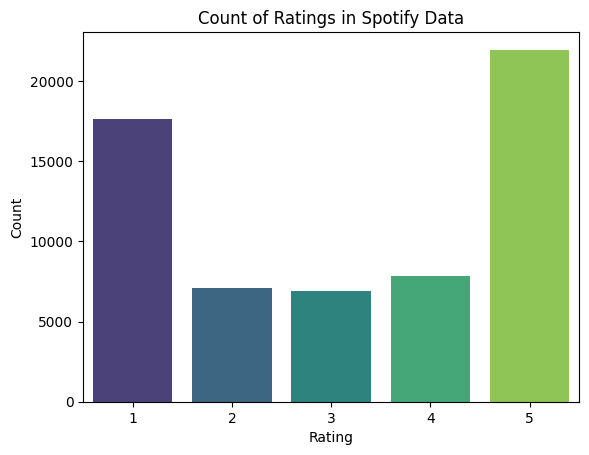

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Rating', data=spotify, palette='viridis')

plt.title('Count of Ratings in Spotify Data')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [43]:
stop_words = stopwords.words('english')
lemmetizer = WordNetLemmatizer()

def textpreprocess(s):
    """This function cleans the text
    Input: string to be cleaned
    Return: string after cleaning
    """
    words = [] # empty list

    s = s.strip().lower() # lower the string
    s = re.sub(r"won't", "will not", s)
    s = re.sub(r"can\'t", "can not", s)
    s = re.sub(r"n\'t", " not", s)
    s = re.sub(r"\'re", " are", s)
    s = re.sub(r"\'s", " is", s)
    s = re.sub(r"\'d", " would", s)
    s = re.sub(r"\'ll", " will", s)
    s = re.sub(r"\'t", " not", s)
    s = re.sub(r"\'ve", " have", s)
    s = re.sub(r"\'m", " am", s)
    s = re.sub('\[.*?\]', '', s) # removes symbols (.*?\)
    s = re.sub('https?://\S+|www\.\S+', '', s) # remove URLS
    s = re.sub('<.*?>+', '', s)
    s = re.sub('[%s]' % re.escape(string.punctuation), '', s) # remove punctuations
    s = re.sub('\n', '', s) # remove next line character
    s = re.sub('\w*\d\w*', '', s)

    words = s.split() # split the string into list of words
    words = [lemmetizer.lemmatize(word) for word in words if word not in stop_words] # removing stop words
    s = ' '.join(words) # converting list to string
    return s

In [44]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [45]:
Cleaned_Review = []
sentences = list(spotify['Review'])
for i in sentences:
  Cleaned_Review.append(textpreprocess(i))


In [46]:
spotify['Cleaned_Review'] = Cleaned_Review
spotify

<ipython-input-46-1b6f8b631c81>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify['Cleaned_Review'] = Cleaned_Review


,Review,Rating,Sentiment,Sentiment Category,Detailed Sentiment,Subjectivity,Has_Reply,Cleaned_Review
0,"Great music service, the audio is high quality...",5,positive,Positive,Positive,0.654667,False,great music service audio high quality app eas...
1,Please ignore previous negative rating. This a...,5,positive,Positive,Neutral,0.495833,False,please ignore previous negative rating app sup...
2,"This pop-up ""Get the best Spotify experience o...",4,positive,Positive,Neutral,0.600000,False,popup get best spotify experience android anno...
3,Really buggy and terrible to use as of recently,1,negative,Negative,Negative,0.483333,False,really buggy terrible use recently
4,Dear Spotify why do I get songs that I didn't ...,1,negative,Neutral,Neutral,0.000000,False,dear spotify get song put playlist shuffle play
...,...,...,...,...,...,...,...,...
61589,Even though it was communicated that lyrics fe...,1,negative,Positive,Positive,0.225000,False,even though communicated lyric feature availab...
61590,"Use to be sooo good back when I had it, and wh...",1,negative,Positive,Positive,0.475000,False,use sooo good back downloaded free version cou...
61591,This app would be good if not for it taking ov...,2,negative,Negative,Neutral,0.458333,False,app would good taking device start comp spotif...
61592,The app is good hard to navigate and won't jus...,2,negative,Positive,Positive,0.535417,False,app good hard navigate let play song click pla...


In [47]:
spotify['Length'] = spotify.Cleaned_Review.apply(lambda x:len(x))
spotify

<ipython-input-47-de352d46bd0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify['Length'] = spotify.Cleaned_Review.apply(lambda x:len(x))


,Review,Rating,Sentiment,Sentiment Category,Detailed Sentiment,Subjectivity,Has_Reply,Cleaned_Review,Length
0,"Great music service, the audio is high quality...",5,positive,Positive,Positive,0.654667,False,great music service audio high quality app eas...,79
1,Please ignore previous negative rating. This a...,5,positive,Positive,Neutral,0.495833,False,please ignore previous negative rating app sup...,69
2,"This pop-up ""Get the best Spotify experience o...",4,positive,Positive,Neutral,0.600000,False,popup get best spotify experience android anno...,69
3,Really buggy and terrible to use as of recently,1,negative,Negative,Negative,0.483333,False,really buggy terrible use recently,34
4,Dear Spotify why do I get songs that I didn't ...,1,negative,Neutral,Neutral,0.000000,False,dear spotify get song put playlist shuffle play,47
...,...,...,...,...,...,...,...,...,...
61589,Even though it was communicated that lyrics fe...,1,negative,Positive,Positive,0.225000,False,even though communicated lyric feature availab...,170
61590,"Use to be sooo good back when I had it, and wh...",1,negative,Positive,Positive,0.475000,False,use sooo good back downloaded free version cou...,156
61591,This app would be good if not for it taking ov...,2,negative,Negative,Neutral,0.458333,False,app would good taking device start comp spotif...,284
61592,The app is good hard to navigate and won't jus...,2,negative,Positive,Positive,0.535417,False,app good hard navigate let play song click pla...,135


In [48]:
spotify.Length.max()

2207

In [49]:

spotify.Length.min()

2

In [50]:
spotify.Length.mean()

99.9702083299399

In [51]:
spotify.Length.mode()

0    44
Name: Length, dtype: int64

In [52]:
spotify['Review'][0]

'Great music service, the audio is high quality and the app is easy to use. Also very quick and friendly support.'

In [53]:
spotify['Review'][0]

'Great music service, the audio is high quality and the app is easy to use. Also very quick and friendly support.'

In [54]:
X = list(spotify['Cleaned_Review'])
y = spotify['Rating']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
len(X_train)

49114

In [56]:
X_train[0]

'open stuck login page'

In [57]:
num_words_ = 5000
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=num_words_, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


In [58]:
tokenizer.word_index

def number_of_keys(dict):

    count = 0

    for key,value in dict.items():

        count += 1

    return count

In [59]:
number_of_keys(tokenizer.word_index) # we should add one to that

25538

In [60]:
for key,value in tokenizer.word_index.items():
    if value == 24000:
         print(key)

conveniant


In [61]:
print(X_train[0])

[98, 456, 269, 399]


In [62]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 300
trunc_type='post'
padding_type='post'

X_train = pad_sequences(X_train, maxlen=maxlen, truncating= trunc_type, padding=padding_type)
X_test = pad_sequences(X_test, padding=padding_type, maxlen=maxlen, truncating= trunc_type)

In [63]:
print(vocab_size)

25539


In [64]:
X_train[0]

array([ 98, 456, 269, 399,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [65]:
y_train[0]


5

In [66]:

y_test = y_test.map(lambda x: x % 5)
y_train = y_train.map(lambda x: x % 5)
'/kaggle/input/glove6b50dtxt/glove.6B.50d.txt'

'/kaggle/input/glove6b50dtxt/glove.6B.50d.txt'

In [67]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('/content/drive/MyDrive/BDM ASSIGNMENT/glove.6B.50d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [68]:
embeddings_dictionary

{'the': array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
        -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
         2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
         1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
        -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
        -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
         4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
         7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
        -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
         1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01],
       dtype=float32),
 ',': array([ 0.013441,  0.23682 , -0.16899 ,  0.40951 ,  0.63812 ,  0.47709 ,
        -0.42852 , -0.55641 , -0.364   , -0.23938 ,  0.13001 , -0.063734,
        -0.39575 , -0.48162 ,  0.23291 ,  0.090201, -0.13324 ,  0.078639,
        -0.4

In [69]:
embedding_matrix = zeros((vocab_size, 50))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
embedding_matrix.shape

(25539, 50)

In [70]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.40037   , -0.79645002,  1.37629998, ...,  0.18685   ,
         1.05229998,  0.38187   ],
       ...,
       [-1.80190003,  1.25030005,  0.40073001, ...,  0.37018001,
        -0.41738001,  0.23932   ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [71]:
model_1 = Sequential()
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=maxlen , trainable=False)

model_1.add(embedding_layer)
model_1.add(Dense(16, activation='relu', kernel_initializer="he_normal" ))
model_1.add(Flatten())
model_1.add(Dense(5, activation='softmax'))

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model_1.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [72]:
history = model_1.fit(X_train, y_train, validation_split=0.2, batch_size = 32, epochs = 15)

Epoch 1/15
1228/1228 [==============================] - 16s 12ms/step - loss: 1.4742 - accuracy: 0.4174 - val_loss: 1.4134 - val_accuracy: 0.4533
Epoch 2/15
1228/1228 [==============================] - 8s 7ms/step - loss: 1.4002 - accuracy: 0.4539 - val_loss: 1.3714 - val_accuracy: 0.4730
Epoch 3/15
1228/1228 [==============================] - 9s 8ms/step - loss: 1.3643 - accuracy: 0.4700 - val_loss: 1.3390 - val_accuracy: 0.4879
Epoch 4/15
1228/1228 [==============================] - 10s 8ms/step - loss: 1.3319 - accuracy: 0.4886 - val_loss: 1.3101 - val_accuracy: 0.5033
Epoch 5/15
1228/1228 [==============================] - 7s 6ms/step - loss: 1.3034 - accuracy: 0.5015 - val_loss: 1.2868 - val_accuracy: 0.5153
Epoch 6/15
1228/1228 [==============================] - 9s 7ms/step - loss: 1.2798 - accuracy: 0.5126 - val_loss: 1.2663 - val_accuracy: 0.5251
Epoch 7/15
1228/1228 [==============================] - 7s 6ms/step - loss: 1.2598 - accuracy: 0.5198 - val_loss: 1.2507 - val_accura

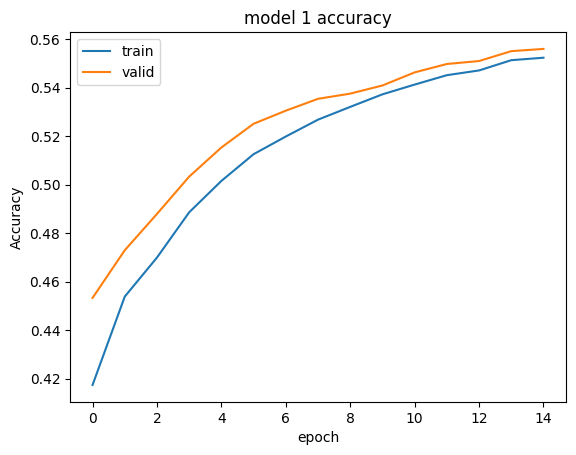

In [73]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model 1 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train','valid'], loc='upper left')
plt.show()

In [74]:
test_loss, test_acc = model_1.evaluate(X_test, y_test)

384/384 [==============================] - 1s 3ms/step - loss: 1.1775 - accuracy: 0.5605


In [75]:
model_5 = Sequential()
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=maxlen , trainable=False)

model_5.add(embedding_layer)
model_5.add(Dense(32, activation='relu', kernel_initializer="he_normal" ))
model_5.add(Dense(16, activation='relu', kernel_initializer="he_normal" ))
model_5.add(Dense(16, activation='relu', kernel_initializer="he_normal" ))
model_5.add(Dense(8, activation='relu', kernel_initializer="he_normal" ))
model_5.add(Dense(8, activation='relu', kernel_initializer="he_normal" ))
model_5.add(Flatten())
model_5.add(Dense(5, activation='softmax'))

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model_5.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model_5.fit(X_train, y_train, validation_split=0.2, batch_size = 32, epochs = 40)

Epoch 1/40
1228/1228 [==============================] - 18s 14ms/step - loss: 1.4604 - accuracy: 0.4203 - val_loss: 1.4093 - val_accuracy: 0.4455
Epoch 2/40
1228/1228 [==============================] - 16s 13ms/step - loss: 1.4147 - accuracy: 0.4388 - val_loss: 1.3928 - val_accuracy: 0.4524
Epoch 3/40
1228/1228 [==============================] - 21s 17ms/step - loss: 1.3986 - accuracy: 0.4467 - val_loss: 1.3764 - val_accuracy: 0.4623
Epoch 4/40
1228/1228 [==============================] - 18s 15ms/step - loss: 1.3755 - accuracy: 0.4627 - val_loss: 1.3496 - val_accuracy: 0.4821
Epoch 5/40
1228/1228 [==============================] - 16s 13ms/step - loss: 1.3414 - accuracy: 0.4864 - val_loss: 1.3159 - val_accuracy: 0.5010
Epoch 6/40
1228/1228 [==============================] - 17s 14ms/step - loss: 1.3004 - accuracy: 0.5066 - val_loss: 1.2773 - val_accuracy: 0.5139
Epoch 7/40
1228/1228 [==============================] - 16s 13ms/step - loss: 1.2657 - accuracy: 0.5208 - val_loss: 1.2478 -

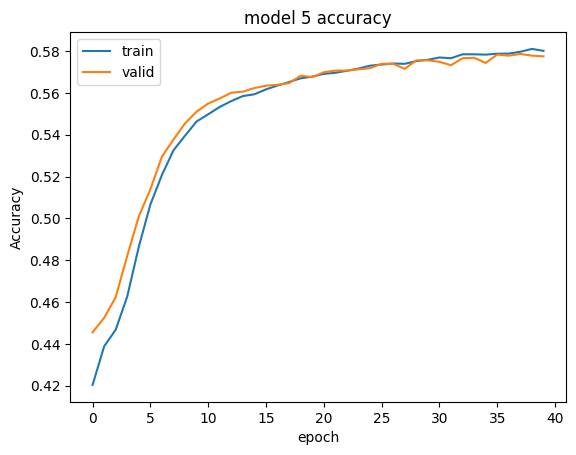

In [76]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model 5 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train','valid'], loc='upper left')
plt.show()

In [77]:
test_loss, test_acc = model_5.evaluate(X_test, y_test)

384/384 [==============================] - 2s 5ms/step - loss: 1.1160 - accuracy: 0.5811


In [78]:
model_7 = Sequential()
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=maxlen , trainable=False)

model_7.add(embedding_layer)
model_7.add(Dense(128, activation='relu', kernel_initializer="he_normal" ))
model_7.add(Dense(64, activation='relu', kernel_initializer="he_normal" ))
model_7.add(Dense(32, activation='relu', kernel_initializer="he_normal" ))
model_7.add(Dense(16, activation='relu', kernel_initializer="he_normal" ))
model_7.add(Dense(8, activation='relu', kernel_initializer="he_normal" ))
model_7.add(Flatten())
model_7.add(Dense(5, activation='softmax'))

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model_7.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model_7.fit(X_train, y_train, validation_split=0.2, batch_size = 32, epochs = 40)

Epoch 1/40
1228/1228 [==============================] - 50s 40ms/step - loss: 1.4667 - accuracy: 0.4219 - val_loss: 1.3998 - val_accuracy: 0.4542
Epoch 2/40
1228/1228 [==============================] - 48s 39ms/step - loss: 1.3856 - accuracy: 0.4589 - val_loss: 1.3497 - val_accuracy: 0.4842
Epoch 3/40
1228/1228 [==============================] - 47s 38ms/step - loss: 1.3304 - accuracy: 0.4917 - val_loss: 1.2965 - val_accuracy: 0.5127
Epoch 4/40
1228/1228 [==============================] - 48s 39ms/step - loss: 1.2779 - accuracy: 0.5185 - val_loss: 1.2548 - val_accuracy: 0.5302
Epoch 5/40
1228/1228 [==============================] - 47s 38ms/step - loss: 1.2363 - accuracy: 0.5351 - val_loss: 1.2203 - val_accuracy: 0.5451
Epoch 6/40
1228/1228 [==============================] - 60s 49ms/step - loss: 1.2053 - accuracy: 0.5456 - val_loss: 1.1954 - val_accuracy: 0.5521
Epoch 7/40
1228/1228 [==============================] - 48s 39ms/step - loss: 1.1830 - accuracy: 0.5530 - val_loss: 1.1779 -

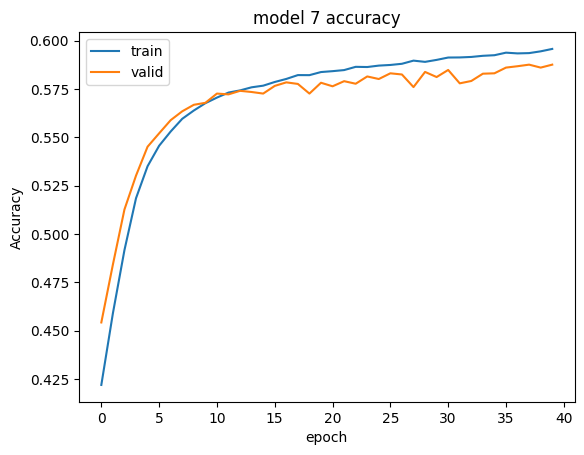

In [79]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model 7 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train','valid'], loc='upper left')
plt.show()

In [81]:
test_loss, test_acc = model_7.evaluate(X_test, y_test)

384/384 [==============================] - 10s 25ms/step - loss: 1.0815 - accuracy: 0.5927


Epoch 1/10
154/154 [==============================] - 83s 513ms/step - loss: nan - accuracy: 0.3578 - val_loss: nan - val_accuracy: 0.3639
Epoch 2/10
154/154 [==============================] - 58s 380ms/step - loss: nan - accuracy: 0.3578 - val_loss: nan - val_accuracy: 0.3639
Epoch 3/10
154/154 [==============================] - 66s 430ms/step - loss: nan - accuracy: 0.3578 - val_loss: nan - val_accuracy: 0.3639
Epoch 4/10
154/154 [==============================] - 60s 392ms/step - loss: nan - accuracy: 0.3578 - val_loss: nan - val_accuracy: 0.3639
Epoch 5/10
154/154 [==============================] - 59s 382ms/step - loss: nan - accuracy: 0.3578 - val_loss: nan - val_accuracy: 0.3639
Epoch 6/10
154/154 [==============================] - 59s 381ms/step - loss: nan - accuracy: 0.3578 - val_loss: nan - val_accuracy: 0.3639
Epoch 7/10
154/154 [==============================] - 59s 386ms/step - loss: nan - accuracy: 0.3578 - val_loss: nan - val_accuracy: 0.3639
Epoch 8/10
154/154 [=======

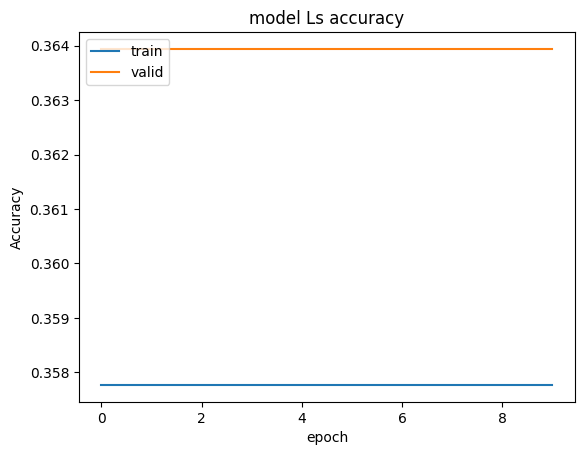

In [82]:
model_Ls = Sequential()
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=maxlen , trainable=False)

model_Ls.add(embedding_layer)
model_Ls.add(LSTM(32, activation='relu', kernel_initializer="he_normal" ))

model_Ls.add(Dense(16, activation='relu', kernel_initializer="he_normal" ))
model_Ls.add(Dense(16, activation='relu', kernel_initializer="he_normal" ))
model_Ls.add(Dense(8, activation='relu', kernel_initializer="he_normal" ))
model_Ls.add(Dense(8, activation='relu', kernel_initializer="he_normal" ))

model_Ls.add(Flatten())
model_Ls.add(Dense(5, activation='softmax'))

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model_Ls.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model_Ls.fit(X_train, y_train, validation_split=0.2, batch_size = 256, epochs = 10)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model Ls accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train','valid'], loc='upper left')
plt.show()

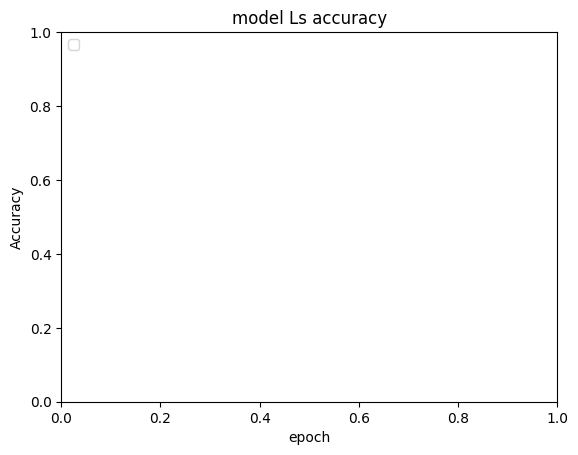

In [83]:
plt.title('model Ls accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train','valid'], loc='upper left')
plt.show()